In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df = df.rename(columns={'race/ethnicity': 'race_ethnicity'})

In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [7]:
# Check missing values
print(df.isna().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [8]:
# Checking Duplicates values
print("Duplicate Values: ",df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Values:  0


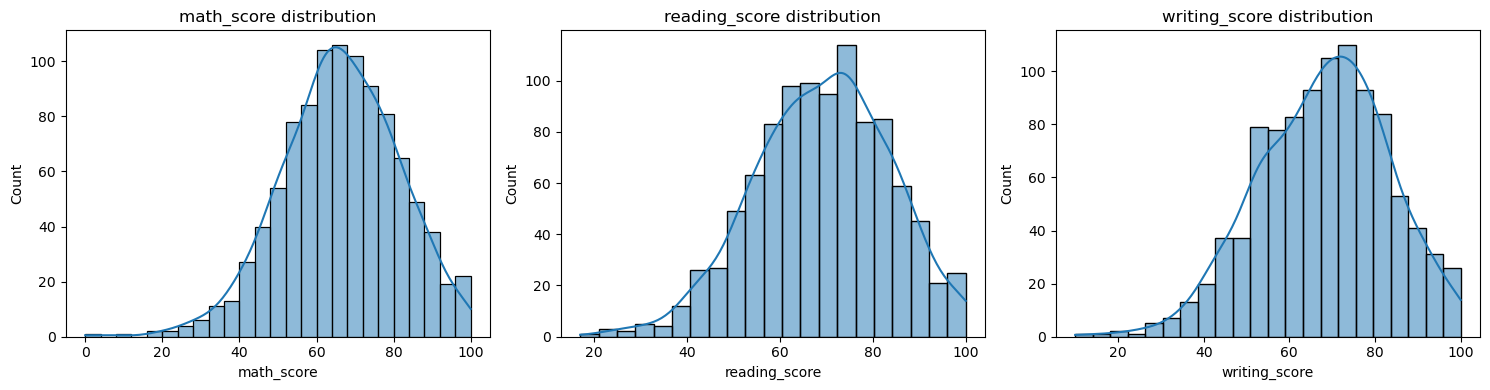

In [10]:
# Score distributions
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, ['math_score','reading_score','writing_score']):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()

In [11]:
# Categorical distributions
for col in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    print(df[col].value_counts(normalize=True) * 100)
    print("-"*40)

gender
female    51.8
male      48.2
Name: proportion, dtype: float64
----------------------------------------
race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64
----------------------------------------
parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64
----------------------------------------
lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64
----------------------------------------
test_preparation_course
none         64.2
completed    35.8
Name: proportion, dtype: float64
----------------------------------------


In [12]:
# Create total & average score
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["avg_score"] = df["total_score"] / 3

In [13]:
# Create performance band
def performance_band(avg):
    if avg >= 80:
        return "High"
    elif avg >= 60:
        return "Medium"
    else:
        return "Low"

In [14]:
df["performance_band"] = df["avg_score"].apply(performance_band)

In [15]:
# Pass/ Fail bands
df["pass_math"] = np.where(df["math_score"] >= 40, 1, 0)
df["pass_reading"] = np.where(df["reading_score"] >= 40, 1, 0)
df["pass_writing"] = np.where(df["writing_score"] >= 40, 1, 0)
df["passed_all"] = np.where(
    (df["pass_math"] == 1) & (df["pass_reading"] == 1) & (df["pass_writing"] == 1),
    1, 0
)

In [16]:
# Grade band
def grade_band(avg):
    if avg >= 80:
        return "A"
    elif avg >= 70:
        return "B"
    elif avg >= 60:
        return "C"
    elif avg >= 50:
        return "D"
    else:
        return "F"

In [17]:
df["grade_band"] = df["avg_score"].apply(grade_band)

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score,performance_band,pass_math,pass_reading,pass_writing,passed_all,grade_band
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Medium,1,1,1,1,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,High,1,1,1,1,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,High,1,1,1,1,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Low,1,1,1,1,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Medium,1,1,1,1,B


In [19]:
df.to_csv("student_performance_clean.csv", index=False)